# Marketing Movies to Foreign Audiences 
#### By Salome Grasland 

## Overview 
Microsoft has launched a new movie studio and has tasked us with figuring out what kind of movies they should produce to make the most monetary impact at the box office. The data shows that the majority of profits on all movies are from foreign audiences. The baseline research showed that on average from 2010 to 2018, foreign revenue accounted for 60.8% of total revenue. The top performing movies with foreign audiences were analyzed to see what draws them in. Movies falling under the genre of adventure, action, and comedy were the most financially successful in foreign markets. Additionally, the top three production studios generating foreign revenue were 20th Century Fox Studios, BV Animation Studios, and Universal Animation Studios. In order to generate the most revenue from foreign markets Microsoft Studios should create an adventure, action, or comedy movie and collaborate with either 20th Century Fox Studios, BV Animation Studios, or Universal Animation Studios


## Business Problem 
Microsoft has just built a brand new studio and is looking to make a new movie, but they aren't sure what kind of movie to produce in order to generate the most revenue. Using data from the Internet Movie Database (IMDb) and Box Office Mojo, trends and variables related to profits were analyzed to see what movies have generated the most revenue with foreign markets and what variables correlate with their success. 


## Data Understanding 
Data from an IMDb SQLite database and a CSV database from Box Office Mojo were used. The IMDb SQLite database contained 8 tables (persons, principals, known_for, directors, writers, movie_basics, movie_ratings, and movie_akas). The ‘movie_basics’ table was used for analysis and it contained six columns (movie_id, primary_title, original_title, start_year, runtime_minutes, and genres) and 146,144 entries. The Box Office Mojo data consisted of five columns (title, studio, domestic_gross, foreign_gross, and year) and contained 3387 entries. This data is all generated from IMDb which is the leading resource for entertainment industry professionals and a subsidiary of Amazon, consisting of over 10 million titles and over 11 million person records. Box Office Mojo was bought by IMDb in 2008 and is currently owned by Amazon. IMDb is a website that tracks box-office data for franchises, genres, actors, filmmakers, distributors, budgets, and brands, in addition to providing profiles, reviews, and summaries of entertainment series, movies, performers, and members of the production crew. These sources were used to look at quantifiable data, such as domestic and foreign movie revenues, as well as categorical data like genre and production studio. The main limitation with this data was that it only included information from the years 2010 to 2018. 


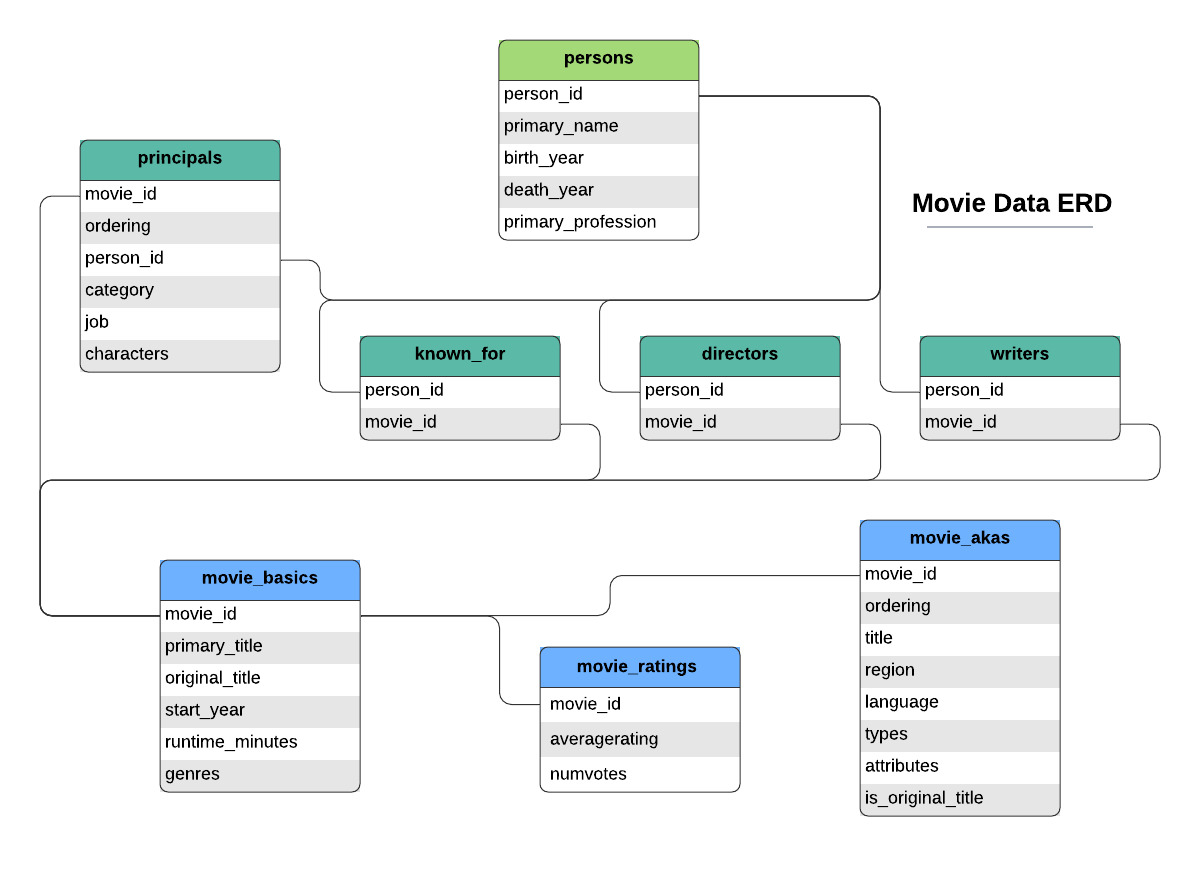

In [2]:
#importing neccessary modules
import pandas as pd 
import sqlite3
import numpy as np 
import requests 
from bs4 import BeautifulSoup as BS
import matplotlib.pyplot as plt
import tabulate
from collections import Counter

%matplotlib inline 
conn = sqlite3.connect('im.db')
cur = conn.cursor()

In [3]:
#seeing available files 
! ls

Phase 1 Project Notebook.ipynb
README.md
bom.movie_gross.csv.gz
domesticvforeigngraph.jpg
genre.txt
im.db
movie_data_erd.jpeg
topperforminggenre.jpg
topperformingstudio.jpg
totalforeign.jpg
totalgross.jpg


In [4]:
#opening bom dataset for primary analysis 
foreign_df = pd.read_csv('bom.movie_gross.csv.gz')
foreign_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
#opening and reviewing imdb datasets from movie_basics for secondary analysis 
imdb = pd.read_sql("""SELECT * FROM movie_basics;""", conn)
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
#opening and reviewing box office mojo dataset for secondary analysis
gross = pd.read_csv('bom.movie_gross.csv.gz')
gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## Data Preparation 

### How Much of Total Revenue Comes From Foreign Markets
The first point analyzed represented how much of total movie revenue came from foreign markets. The Box Office Mojo Dataset was used for this analysis, as Mojo contains information on the movie’s title, production studio, domestic gross, foreign gross, and year of release. All numeric data pulled from Mojo was converted to float type, and the provided data was used to create three new columns: total gross, domestic gross as a percent of total gross, and foreign gross as a percent of total gross, the latter two given the alias ‘domestic_gross%’ and ‘foreign_gross%’. The panda method .describe() was used to pull descriptive statistics. 

### What Genre and Studios Perform Best With Foreign Markets 
The second point analyzed were variables correlated with well-performing movies in foreign markets. For a movie to be considered well-performing it had to generate a foreign revenue above the quartile 3 value of 75,050,000 USD. The Box Office Mojo and IMDb datasets were used for this. The movie_basics table was used from the IMDb SQLite database. This table consists of six columns: ‘movie_id’, ‘primary_title’, ‘original_title’, ‘start_year’, ‘runtime_minutes’, and ‘genres’. Two columns were dropped, ‘original_title’ and ‘movie_id’, because they provided similar information to ‘primary_title’. The ‘primary_title’ column was renamed to ‘title’ to simplify merging with the Box Office Mojo dataset. Duplicate values from “title” were dropped for both the IMDb and Box Office Mojo dataset and the two datasets were merged. 

The merged data frame, called ‘df’, contained seven columns: ‘title’, ‘start_year’, ‘runtime_minutes’, ‘genres’, ‘studio’, ‘domestic_gross’ and ‘foreign_gross’ and 420 entries. All numeric data was converted to float type and a quartile 3 value of  75,050,000 USD was found for foreign_gross. Any movie that had a foreign gross of less than 75,050,000 USD was dropped from the dataframe because the business problem wants us to consider only top performing movies in foreign markets. The data was then sorted by descending foreign gross values and the panda methods .describe() was used to generate descriptive statistics. 

All missing values were dropped from ‘genres’ and spaces were added after commas. The ‘genres’ column was converted to a countable list and imported as a .txt file to make it compatible with the Counter module. 


In [7]:
#converting foreign_gross to float 
foreign_df['foreign_gross'] = pd.to_numeric(foreign_df['foreign_gross'], errors = 'coerce')
foreign_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [8]:
#adding total gross column
foreign_df['total_gross'] =  foreign_df['domestic_gross'] + foreign_df['foreign_gross']
foreign_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [9]:
#adding domestic_gross and foreign_gross % columns 
foreign_df['domestic_gross%'] = (foreign_df['domestic_gross']/foreign_df['total_gross'])*100
foreign_df['foreign_gross%'] = (foreign_df['foreign_gross']/foreign_df['total_gross'])*100
foreign_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross,domestic_gross%,foreign_gross%
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,38.894096,61.105904
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09,32.588981,67.411019
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08,30.823701,69.176299
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,35.325365,64.674635
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,31.716715,68.283285


In [10]:
#grouping data by year 
foreign_df = foreign_df.groupby('year').mean()
foreign_df.head(18)

,domestic_gross,foreign_gross,total_gross,domestic_gross%,foreign_gross%
year,,,,,
2010,3.144559e+07,4.577789e+07,7.937058e+07,44.900618,55.099382
2011,2.535052e+07,5.348459e+07,8.791040e+07,34.902575,65.097425
2012,2.767584e+07,6.815155e+07,1.139953e+08,39.068964,60.931036
2013,3.128212e+07,8.103607e+07,1.356955e+08,38.429078,61.570922
2014,2.643923e+07,7.131079e+07,1.158318e+08,34.513019,65.486981
2015,2.461338e+07,8.087209e+07,1.281135e+08,41.566406,58.433594
2016,2.598996e+07,9.804637e+07,1.554744e+08,39.481392,60.518608
2017,3.416646e+07,1.132821e+08,1.717028e+08,38.017031,61.982969
2018,3.601042e+07,1.015959e+08,1.602328e+08,42.003917,57.996083


In [11]:
#getting stats on data
foreign_df.describe()

,domestic_gross,foreign_gross,total_gross,domestic_gross%,foreign_gross%
count,9.000000e+00,9.000000e+00,9.000000e+00,9.000000,9.000000
mean,2.921928e+07,7.928415e+07,1.275919e+08,39.209222,60.790778
std,4.131086e+06,2.232454e+07,3.177590e+07,3.325730,3.325730
min,2.461338e+07,4.577789e+07,7.937058e+07,34.513019,55.099382
25%,2.598996e+07,6.815155e+07,1.139953e+08,38.017031,58.433594
50%,2.767584e+07,8.087209e+07,1.281135e+08,39.068964,60.931036
75%,3.144559e+07,9.804637e+07,1.554744e+08,41.566406,61.982969
max,3.601042e+07,1.132821e+08,1.717028e+08,44.900618,65.486981


In [12]:
#creating the dataframe to graph domestic versus foreign gross 
df_graph = pd.DataFrame().assign(domestic_gross=foreign_df['domestic_gross'], foreign_gross=foreign_df['foreign_gross'])
df_graph.head()

,domestic_gross,foreign_gross
year,,
2010,3.144559e+07,4.577789e+07
2011,2.535052e+07,5.348459e+07
2012,2.767584e+07,6.815155e+07
2013,3.128212e+07,8.103607e+07
2014,2.643923e+07,7.131079e+07


In [13]:
#creating dataframe of percents
df_percent = pd.DataFrame().assign(domestic_gross=foreign_df['domestic_gross%'], foreign_gross=foreign_df['foreign_gross%'])
df_percent.head(18)


,domestic_gross,foreign_gross
year,,
2010,44.900618,55.099382
2011,34.902575,65.097425
2012,39.068964,60.931036
2013,38.429078,61.570922
2014,34.513019,65.486981
2015,41.566406,58.433594
2016,39.481392,60.518608
2017,38.017031,61.982969
2018,42.003917,57.996083


In [14]:
#dropping 'original_title' & 'movie_id'
#because they are similar to 'primary_title'
imdb = imdb.drop(['original_title'], axis = 1)
imdb = imdb.drop(['movie_id'], axis = 1)

#renaming 'primary_title' to 'title' to simplify merging
imdb = imdb.rename(columns={'primary_title' : 'title'})

#dropping duplicate values in 'title'
imdb = imdb.drop_duplicates(subset= 'title')
imdb.head()

,title,start_year,runtime_minutes,genres
0,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,The Other Side of the Wind,2018,122.0,Drama
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


In [15]:
#dropping unnecessary columns and duplicate movie tiles 
gross = gross.drop(['year'], axis = 1)
gross.drop_duplicates(subset=['title'])

,title,studio,domestic_gross,foreign_gross
0,Toy Story 3,BV,415000000.0,652000000
1,Alice in Wonderland (2010),BV,334200000.0,691300000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000
3,Inception,WB,292600000.0,535700000
4,Shrek Forever After,P/DW,238700000.0,513900000
...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN
3383,Edward II (2018 re-release),FM,4800.0,NaN
3384,El Pacto,Sony,2500.0,NaN
3385,The Swan,Synergetic,2400.0,NaN


In [16]:
#printing column names in each dataset to find which to merge on
print(imdb.columns.tolist())
print(gross.columns.tolist())

['title', 'start_year', 'runtime_minutes', 'genres']
['title', 'studio', 'domestic_gross', 'foreign_gross']


In [17]:
#merging the imdb and gross datasets on "title"
df = imdb.merge(gross, how='outer', on='title')
df.head()

,title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross
0,Sunghursh,2013.0,175.0,"Action,Crime,Drama",NaN,NaN,NaN
1,One Day Before the Rainy Season,2019.0,114.0,"Biography,Drama",NaN,NaN,NaN
2,The Other Side of the Wind,2018.0,122.0,Drama,NaN,NaN,NaN
3,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama",NaN,NaN,NaN
4,The Wandering Soap Opera,2017.0,80.0,"Comedy,Drama,Fantasy",NaN,NaN,NaN


In [18]:
#checking the columns datatypes and converting them to the appropriate type
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors = 'coerce')
df.dtypes

title               object
start_year         float64
runtime_minutes    float64
genres              object
studio              object
domestic_gross     float64
foreign_gross      float64
dtype: object

In [19]:
#Finding Q3 for foreign_gross
foreign_Q3 = df['foreign_gross'].quantile(0.75)
print(foreign_Q3)

75050000.0


In [20]:
#limiting the dataset to show values only above the foreign_gross Q3
df = df[df['foreign_gross'] > 75050000.0]
df.describe()

,start_year,runtime_minutes,domestic_gross,foreign_gross
count,422.000000,416.000000,5.060000e+02,5.080000e+02
mean,2013.938389,115.033654,1.269572e+08,2.484967e+08
std,2.587379,20.334523,1.109732e+08,1.856099e+08
min,2010.000000,16.000000,1.810000e+04,7.520000e+07
25%,2012.000000,100.000000,5.472500e+07,1.105250e+08
50%,2014.000000,113.000000,1.002000e+08,1.846500e+08
75%,2016.000000,129.000000,1.720750e+08,3.292500e+08
max,2019.000000,180.000000,7.001000e+08,9.605000e+08


In [21]:
#dropping rows where 'genres' is not available
df = df.dropna(subset = ['genres'])
df.head()

,title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross
54,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",Fox,58200000.0,129900000.0
61,Spy,2011.0,110.0,"Action,Crime,Drama",Fox,110800000.0,124800000.0
71,Tangled,2010.0,100.0,"Adventure,Animation,Comedy",BV,200800000.0,391000000.0
73,John Carter,2012.0,132.0,"Action,Adventure,Sci-Fi",BV,73100000.0,211100000.0
95,The A-Team,2010.0,117.0,"Action,Adventure,Thriller",Fox,77200000.0,100000000.0


In [22]:
#sorting values in descending order by foreign_gross
df = df.sort_values(['foreign_gross'], ascending=False)
df.head()

,title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross
37794,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",BV,459000000.0,946400000.0
80067,Jurassic World: Fallen Kingdom,2018.0,128.0,"Action,Adventure,Sci-Fi",Uni.,417700000.0,891800000.0
6575,Frozen,2010.0,93.0,"Adventure,Drama,Sport",BV,400700000.0,875700000.0
111301,Wolf Warrior 2,2017.0,123.0,"Action,Drama,Thriller",HC,2700000.0,867600000.0
28028,Transformers: Age of Extinction,2014.0,165.0,"Action,Adventure,Sci-Fi",Par.,245400000.0,858600000.0


In [23]:
#inserting space after comma in genres column
df = df.replace(to_replace=',', value=', ', regex=True)
df.head()

,title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross
37794,Avengers: Age of Ultron,2015.0,141.0,"Action, Adventure, Sci-Fi",BV,459000000.0,946400000.0
80067,Jurassic World: Fallen Kingdom,2018.0,128.0,"Action, Adventure, Sci-Fi",Uni.,417700000.0,891800000.0
6575,Frozen,2010.0,93.0,"Adventure, Drama, Sport",BV,400700000.0,875700000.0
111301,Wolf Warrior 2,2017.0,123.0,"Action, Drama, Thriller",HC,2700000.0,867600000.0
28028,Transformers: Age of Extinction,2014.0,165.0,"Action, Adventure, Sci-Fi",Par.,245400000.0,858600000.0


In [24]:
#converting genre column to countable list
genres_list = df['genres'].tolist()

In [25]:
#genres_list was not compatible with Counter module
#the list was exported to a .txt file 
#and imported back into the notebook
text = pd.read_table('genre.txt', names=['genre'])
text.head()

,genre
0,"'Action', 'Adventure', 'Sci-Fi', 'Action', 'Ad..."


## Data Visualization
### How Much of Total Revenue Comes From Foreign Markets
The cleaned Box Office Mojo dataset was used to consider our first point– how much of total movie revenue is coming from foreign markets and how has this changed over time. The data was grouped by year to observe market trends over time and a stacked bar graph was used to compare yearly revenue generated by domestic markets versus foreign markets from 2010 to 2018. Scatter plots with trend lines were generated using values from ‘domestic_gross%’ and ‘foreign_gross%’. The trend line was included to demonstrate the consistency in revenue from domestic and foreign markets. 
### What Genre and Studios Perform Best With Foreign Markets 
The merged dataset from IMDb and Box Office Mojo called ‘df’ was used to consider the second question– what variables correlate with high foreign revenues. The data frame contained movies that only were in the top quartile of foreign revenue. Using the Counter module frequencies were found for ‘genres’ and ‘studio’. A bar graph was found to be the most effective mode to visually communicate the top performing ‘genres’ and ‘studios’ in foreign markets. 


In [26]:
#function pulled from matplotlib to change y values
def currency(x, pos):
    """The two arguments are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

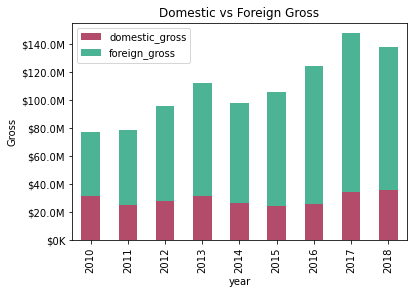

In [27]:
#plotting domestic_gross versus foreign_gross in pandas
ax = df_graph.plot.bar(stacked=True, color={"domestic_gross": "#b34c6a", "foreign_gross": "#4CB395"})

# Remove scientific notation from y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(currency)

#Adding labels 
plt.title('Domestic vs Foreign Gross')
plt.ylabel('Gross');


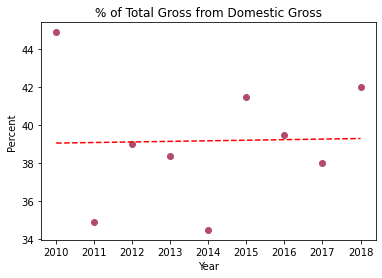

 
0.03 x - 21.23


In [28]:
#Plotting domestic_gross% as a scatter plot with trend line 
y = 44.9, 34.9, 39, 38.4, 34.5, 41.5, 39.5, 38, 42
x = 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018
plt.scatter(x, y, color='#b34c6a')

#adding labels
plt.title('% of Total Gross from Domestic Gross')
plt.xlabel('Year')
plt.ylabel('Percent')

#adding trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r--')
plt.show()

#getting trend line value 
print(p)

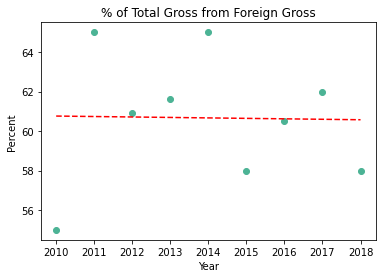

 
-0.02333 x + 107.7


In [29]:
#Plotting foreign_gross% as a scatter plot with trend line 
y = 55, 65, 60.9, 61.6, 65, 58, 60.5, 62, 58
x = 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018
plt.scatter(x, y, color='#4CB395')

#adding labels
plt.title('% of Total Gross from Foreign Gross')
plt.xlabel('Year')
plt.ylabel('Percent')

#adding trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r--')
plt.show()

#getting trend line value
print(p)

In [30]:
#Using counter to get frequency of genre
from collections import Counter
def word_count(fname):
        with open(fname) as f:
                return Counter(f.read().split())

print(word_count('genre.txt'))

Counter({"'Adventure',": 227, "'Action',": 210, "'Comedy',": 151, "'Drama',": 120, "'Animation',": 73, "'Thriller',": 69, "'Sci-Fi',": 62, "'Fantasy',": 50, "'Family',": 30, "'Romance',": 30, "'Crime',": 29, "'Mystery',": 27, "'Biography',": 24, "'Horror',": 22, "'History',": 12, "'Music',": 5, "'Western',": 4, "'Sport',": 3, "'Documentary',": 3, "'Musical',": 2, "'War',": 2, "'Romance,": 1, "Music',": 1, "'Sci-Fi'": 1})


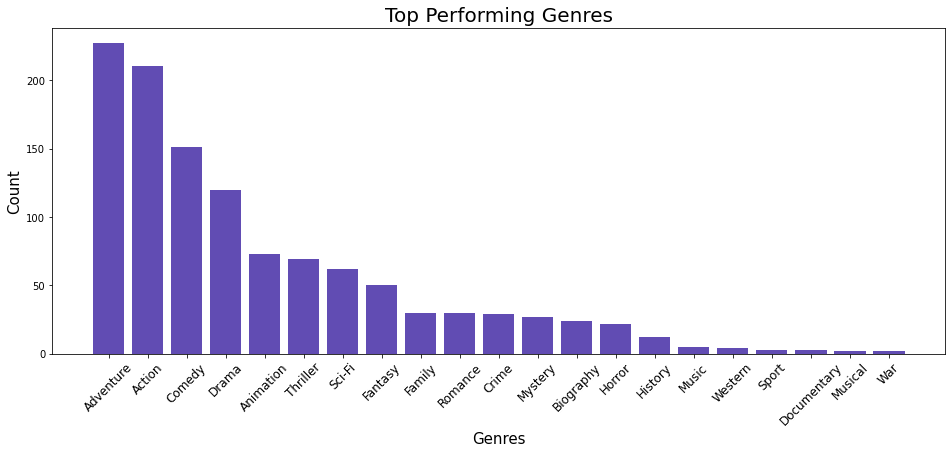

In [31]:
#Putting genre frequency in bar plot 
data = ({'Adventure': 227, 'Action': 210, 'Comedy': 151, 'Drama': 120, 'Animation': 73, 'Thriller': 69, 'Sci-Fi': 62, 'Fantasy': 50, 'Family': 30, 'Romance': 30, 'Crime': 29, 'Mystery': 27, 'Biography': 24, 'Horror': 22, 'History': 12, 'Music': 5, 'Western': 4, 'Sport': 3, 'Documentary': 3, 'Musical': 2, 'War': 2})
names = list(data.keys())
values = list(data.values())

#plotting the chart, adding labels, and making adjustments
plt.figure(figsize=(16, 6))
plt.bar(range(len(data)), values, tick_label=names, color='#614CB3')
plt.xticks(rotation = 45, fontsize=12)
plt.title('Top Performing Genres', fontsize=20)
plt.xlabel('Genres', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [32]:
#counting the frequency of each studio
studio_counts = Counter(df['studio'])
print(studio_counts)

Counter({'Fox': 62, 'BV': 55, 'Uni.': 50, 'WB': 44, 'Sony': 43, 'Par.': 38, 'WB (NL)': 21, 'WGUSA': 12, 'LGF': 12, 'LG/S': 11, 'Wein.': 9, 'P/DW': 8, 'CL': 7, 'FoxS': 7, 'SGem': 5, 'TriS': 4, 'Sum.': 3, 'Rela.': 3, 'Focus': 3, 'Yash': 3, 'FUN': 2, 'STX': 2, 'HC': 1, 'FR': 1, 'UTV': 1, 'GrtIndia': 1, 'Magn.': 1, 'WAMCR': 1, 'W/Dim.': 1, nan: 1, 'LGP': 1, 'Vari.': 1, 'MGM': 1, 'EOne': 1, 'MBox': 1, 'SPC': 1, 'WHE': 1, 'RTWC': 1})


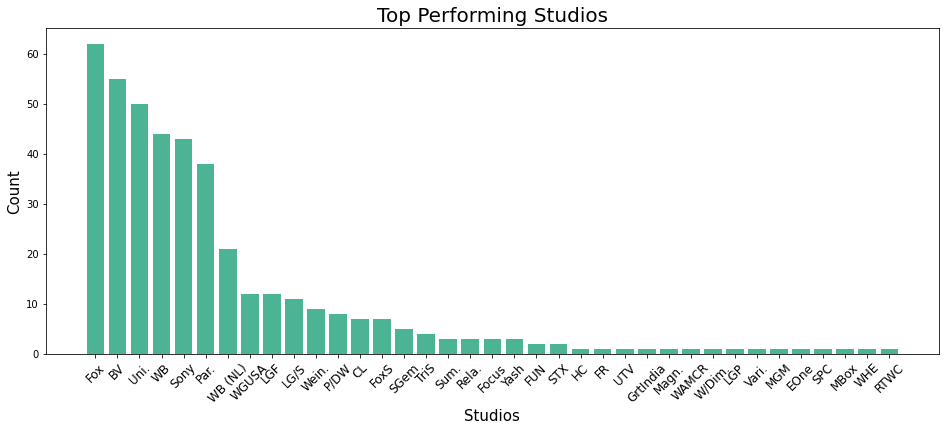

In [33]:
#putting studio frequency in a bar plot 
#assigning variables to the values
data = ({'Fox': 62, 'BV': 55, 'Uni.': 50, 'WB': 44, 'Sony': 43, 'Par.': 38, 'WB (NL)': 21, 'WGUSA': 12, 'LGF': 12, 'LG/S': 11, 'Wein.': 9, 'P/DW': 8, 'CL': 7, 'FoxS': 7, 'SGem': 5, 'TriS': 4, 'Sum.': 3, 'Rela.': 3, 'Focus': 3, 'Yash': 3, 'FUN': 2, 'STX': 2, 'HC': 1, 'FR': 1, 'UTV': 1, 'GrtIndia': 1, 'Magn.': 1, 'WAMCR': 1, 'W/Dim.': 1, 'LGP': 1, 'Vari.': 1, 'MGM': 1, 'EOne': 1, 'SPC': 1, 'MBox': 1, 'WHE': 1, 'RTWC': 1})
names = list(data.keys())
values = list(data.values())

#plotting the chart, adding labels, and making adjustments
plt.figure(figsize=(16, 6))
plt.bar(range(len(data)), values, tick_label=names, color='#4CB395')
plt.xticks(rotation = 45, fontsize=12)
plt.title('Top Performing Studios', fontsize=20)
plt.xlabel('Studios', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

## Evaluation
Microsoft just opened a new studio and wants to know what kind of movie they should produce in order to generate max revenue. The baseline research showed that on average from 2010 to 2018, foreign revenue accounted for 60.8% of total revenue. The trendline plotted had a value of -0.02333x + 107.7, showing that foreign revenue values have remained consistent over time. Hence, the data shows that producing a movie that performs well with foreign audiences is a good strategy to generate max revenue. 

The top three foreign grossing genres were ‘adventure’, ‘action’, and ‘comedy’— respectively accounting for 19.6%, 18.1%, and 13% of top performing movies in foreign markets. The top three foreign grossing studios were ‘20th Century Fox Studios’, ‘BV Animation Studios’, and ‘Universal Animation Studios,’ respectively accounting for 14.7%, 13%, and 11.9% of production for top performing movies in foreign markets. The top three performing movies in foreign markets from 2010 to 2018 were: 

1. “Avengers: Age of Ultron” produced by BV Animation Studios 
(genre: Action, Adventure, Sci-Fi)
2. “Jurassic World: Fallen Kingdom” produced by Universal Animation Studios (genre: Action, Adventure, Sci-Fi)
3.“Frozen” produced by BV Animation Studios 
(genre: Adventure, Drama, Sport)

Results are corroborated by the top three performing movies which were all produced by one of the top three performing studios in foreign markets. And all three top performing movies fell into a top performing genre category in foreign markets. Hence, the data shows that this model could with confidence benefit Microsoft Studios if implemented. 


## Conclusions
In order to generate revenue Microsoft Studios should follow these three recommendations:

1. Focus on foreign markets because they generate the most revenue 
2. Create an adventure, action, or comedy movie and 
3. Collaborate with either 20th Century Fox Studios, BV Animation Studios, or Universal Animation Studios


While the analysis shows this a good strategy to generate revenues, Microsoft Studios may want to consider the movie's delivery methods. While foreign audiences do have the opportunity to go to the theaters, it is not as popular as in the United States. Foreign audiences rely more heavily on streaming services and physical media such as DVDs and preloaded thumb drives to access movies. Microsoft should budget for:

1. The cost of copyrighting the film for foreign streaming services and 
2. The production and delivery of physical materials 

Future considerations could also look at:

1. Production language to see if foreign audiences are more drawn to movies produced in their native tongue
2. Filming locations to see if foreign audiences are more drawn to movies filmed in familiar locations


## For More Information
For additional info, contact Salome Grasland at salome.grasland@gmail.com 
